In [3]:
import tensorflow as tf
import numpy as np
import pandas as pd
import sklearn

In [11]:
dftrain = pd.read_csv('https://storage.googleapis.com/tf-datasets/titanic/train.csv', ) # training data
dfeval = pd.read_csv('https://storage.googleapis.com/tf-datasets/titanic/eval.csv') # testing data

print(dftrain.head())
print()

y_train = dftrain.pop('survived')
y_eval = dfeval.pop('survived')

   survived     sex   age  n_siblings_spouses  parch     fare  class     deck  \
0         0    male  22.0                   1      0   7.2500  Third  unknown   
1         1  female  38.0                   1      0  71.2833  First        C   
2         1  female  26.0                   0      0   7.9250  Third  unknown   
3         1  female  35.0                   1      0  53.1000  First        C   
4         0    male  28.0                   0      0   8.4583  Third  unknown   

   embark_town alone  
0  Southampton     n  
1    Cherbourg     n  
2  Southampton     y  
3  Southampton     n  
4   Queenstown     y  



<AxesSubplot:>

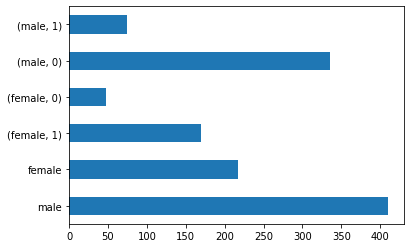

In [91]:
pd.concat([dftrain.sex.value_counts(), pd.concat([dftrain, y_train], axis=1).groupby('sex').survived.value_counts()]).plot(kind='barh')

<AxesSubplot:>

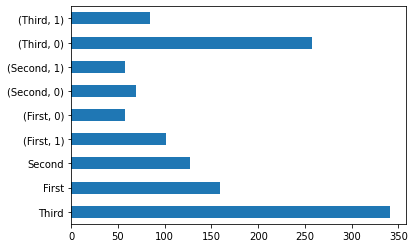

In [89]:
pd.concat([dftrain['class'].value_counts(), pd.concat([dftrain, y_train], axis=1).groupby('class').survived.value_counts()]).plot(kind='barh')

In [143]:
numerical_columns = [x for x in dftrain.columns if ('int' in str(dftrain.dtypes[x]) or 'float' in str(dftrain.dtypes[x]))]
categorical_columns = [x for x in dftrain.columns if x not in numerical_columns]

feature_columns = [tf.feature_column.numeric_column(x, dtype=tf.float32) for x in numerical_columns]
feature_columns += [tf.feature_column.categorical_column_with_vocabulary_list(y, dftrain[y].unique()) 
                    for y in categorical_columns]

def make_input_fn(data_df, label_df, num_epochs=10, shuffle=True, batch_size=32):
  def input_function():  # inner function, this will be returned
    ds = tf.data.Dataset.from_tensor_slices((dict(data_df), label_df))  # create tf.data.Dataset object with data and its label
    if shuffle:
      ds = ds.shuffle(1000)  # randomize order of data
    ds = ds.batch(batch_size).repeat(num_epochs)  # split dataset into batches of 32 and repeat process for number of epochs
    return ds  # return a batch of the dataset
  return input_function  # return a function object for use

In [148]:
train_input_fn = make_input_fn(dftrain, y_train)
eval_input_fn = make_input_fn(dfeval, y_eval, num_epochs=1, shuffle=False)

linear_estimator = tf.estimator.LinearClassifier(feature_columns = feature_columns) # defining model
linear_estimator.train(train_input_fn)  # train
result = linear_estimator.evaluate(eval_input_fn)  # get model metrics/stats by testing on tetsing data

# clear_output()  # clears consoke output
print(); print()
print(result['accuracy'])  # the result variable is simply a dict of stats about our model
print(result)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\rrohi\\AppData\\Local\\Temp\\tmp5jntxqa0', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_checkpoint_save_graph_def': True, '_service': None, '_cluster_spec': ClusterSpec({}), '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}
INFO:tensorflow:Calling model_fn.
INFO:tensorf

In [165]:
prediction1 = list(linear_estimator.predict(eval_input_fn))
for x in range(10):
    print(dfeval.loc[x])
    print('Chance of survival:', prediction1[x]['probabilities'][1]*100, '%')
    print(); print()

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\rrohi\AppData\Local\Temp\tmp5jntxqa0\model.ckpt-200
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
sex                          male
age                          35.0
n_siblings_spouses              0
parch                           0
fare                         8.05
class                       Third
deck                      unknown
embark_town           Southampton
alone                           y
Name: 0, dtype: object
Chance of survival: 8.246619254350662 %


sex                          male
age                          54.0
n_siblings_spouses              0
parch                           0
fare                      51.8625
class                       First
deck                            E
embark_town           Southampton
alone                           y
Name: 1, dtype: object
Chan